# House price predictor

### Task 1 : First we need to create and read our dataset

In [1]:
import pandas as pd

df = pd.read_csv("public/Housing2.csv")
df

,area,bedrooms,bathrooms,stories,parking,price
0,1426,2,1,2,1,18183
1,1160,1,1,2,1,14428
2,1430,1,1,1,0,15920
3,1395,2,2,2,0,17403
4,1344,3,2,1,1,18004
...,...,...,...,...,...,...
495,957,3,1,1,1,13562
496,1050,3,1,2,1,14637
497,887,3,1,2,1,13666
498,1332,2,2,1,1,16592


### Task 2 : Analyze the dataset

In [5]:
print("Housing data shape : " , df.shape)
df.head()

Housing data shape :  (59, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Task 3 : We need to clean our datasets 

* now is to understand what the dataset contains before cleaning anything.

In [ ]:
# we have properties to find columns name and thier types
df.columns
df.dtypes

# For column informations you have another method info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             59 non-null     int64 
 1   area              59 non-null     int64 
 2   bedrooms          59 non-null     int64 
 3   bathrooms         59 non-null     int64 
 4   stories           59 non-null     int64 
 5   mainroad          59 non-null     object
 6   guestroom         59 non-null     object
 7   basement          59 non-null     object
 8   hotwaterheating   59 non-null     object
 9   airconditioning   59 non-null     object
 10  parking           59 non-null     int64 
 11  prefarea          59 non-null     object
 12  furnishingstatus  59 non-null     object
dtypes: int64(6), object(7)
memory usage: 6.1+ KB


#### Missing values and statistics for data cleaning

In [6]:
# find missing values is it on that dataset with sum method it will givw total count
df.isnull().sum()

# Basic statistics
df.describe(include="object")

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,59,59,59,59,59,59,59
unique,1,2,2,2,2,2,3
top,yes,no,no,no,yes,no,furnished
freq,59,40,36,54,44,35,25


#### Identify Categorical vs Numeric Columns

In [ ]:
#  This automatically separates them.
numeric_col = df.select_dtypes(include=["int64" , "float64"])
numeric_col

categorical_col = df.select_dtypes(include=["object"]).columns
categorical_col

#### Fix missing values, remove useless columns and prepare the data for preprocessing.

In [ ]:
# Remove the useless colums

rm_col = df.drop(columns=["mainroad" , "furnishingstatus" , "guestroom" , "basement" , "hotwaterheating" ,  
"airconditioning" ,  "parking" , "prefarea" , "stories"])

rm_col

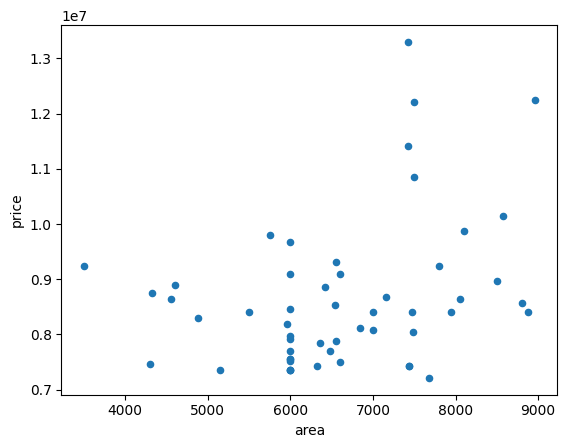

In [10]:
# For detecting outliers
import matplotlib.pyplot as plt

df.plot(x="area",y="price" , kind="scatter")
plt.show()

* Most areas are between 4000 to 9000

* Some points are around 15000+ area

* Those are outliers.

In [ ]:
# Removing outliers for making our datasets clean using range methods

df = df[(df["area"] > 3000) & (df["area"] < 9000)]

# Removing outliers for making our datasets clean using IQR methods

Q1 = df["area"].quantile(0.25)
Q3 = df["area"].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
higher_limit = Q3 + 1.5 * IQR

df = df[(df["area"] > lower_limit) & (df["area"] < higher_limit)]

### Plot diagram of price and area after removing outliers

* After a analyzing you will get all point close and model can easily predict the price

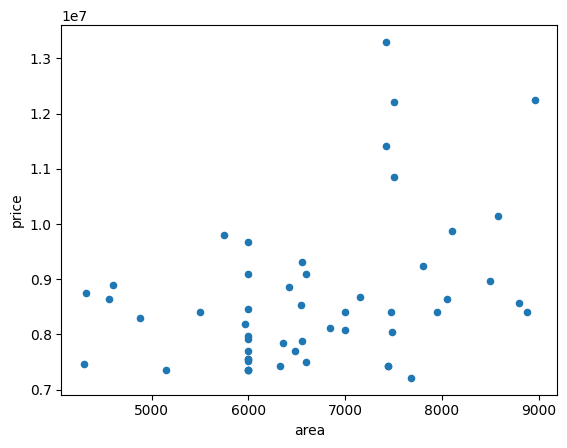

In [13]:
df.plot(x="area" , y="price" , kind = "scatter")
plt.show()

### Data preprocessing

* The goal now is to prepare the data so your model can learn correctly.

In [2]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Split features and target
X = df[["area" , "bedrooms"	, "bathrooms",	"stories",	"parking"]]# For the input
y = df["price"] # for the target


# Now i have to make my model learn input and Keep 20–30% data for testing.
# i will do it with the help of train test split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)

# 4. Scaling ONLY the features (not target)
scaler = MinMaxScaler()

# Fit scaler on training features
scaler.fit(X_train)

# Transform train and test features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train the Linear Regression model
model = LinearRegression()

model.fit(X_train_scaled, y_train)

# Make predictions

predictions = model.predict(X_test_scaled)

# 7. Check performance
mse = mean_squared_error(y_test , predictions)
r2 = r2_score(y_test , predictions)

print("Predictions : ", predictions[:4])      # first 10 predictions
print("Actual Price:", list(y_test[:4]))      # Compare with real data
print("MSE:", mse)
print("R2 Score:", r2)

Predictions :  [13849.44586774 16656.43404007 15710.68663128 12027.74575737]
Actual Price: [13363, 16618, 16461, 11498]
MSE: 535571.8801125826
R2 Score: 0.936181773627329


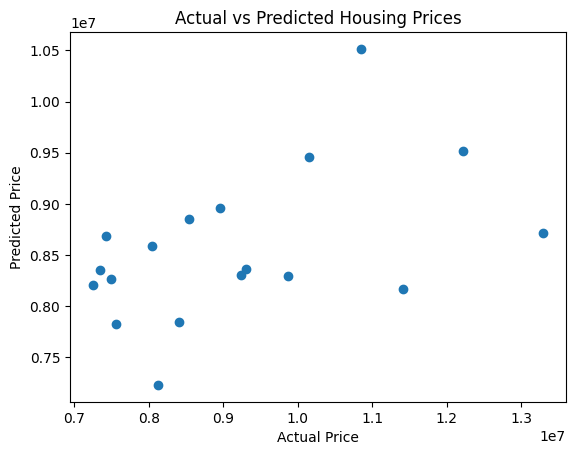

In [26]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.show()